In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1347,2020-08-19,United Kingdom,320399.0,320286.0,41430.0,41381.0,113.0,49.0
1348,2020-08-19,Germany,224643.0,226914.0,9240.0,9243.0,-2271.0,-3.0
1349,2020-08-19,Iran,349430.0,347835.0,20047.0,19972.0,1595.0,75.0
1350,2020-08-19,Turkey,251590.0,251805.0,6013.0,6016.0,-215.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  5845.076183431953
RMSE =  22833.532388496933


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  296.0221893491124
RMSE =  722.2987117488739


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  38384.61240310078
RMSE =  70966.33038863893
-- World performances for deaths --
MAE =  1603.124031007752
RMSE =  1970.47969408624


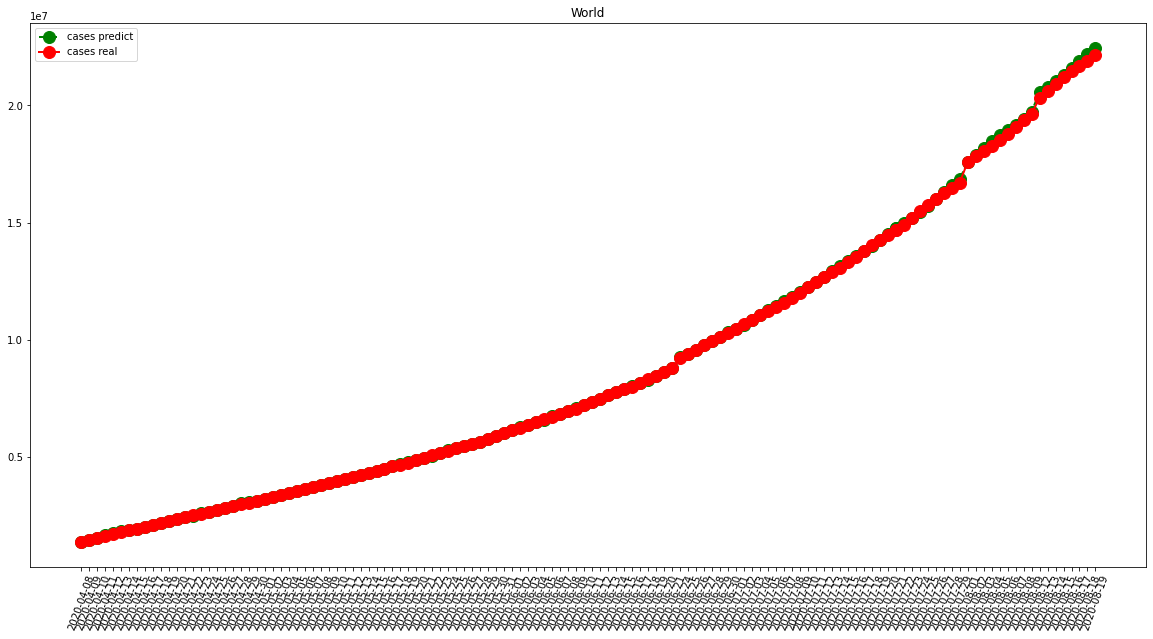

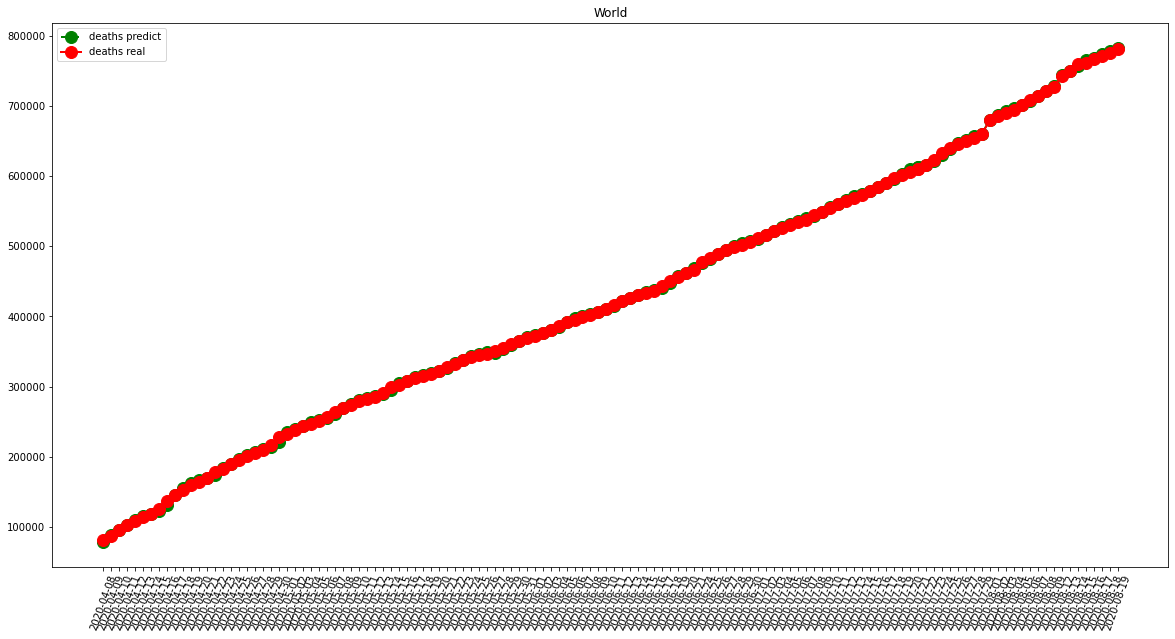

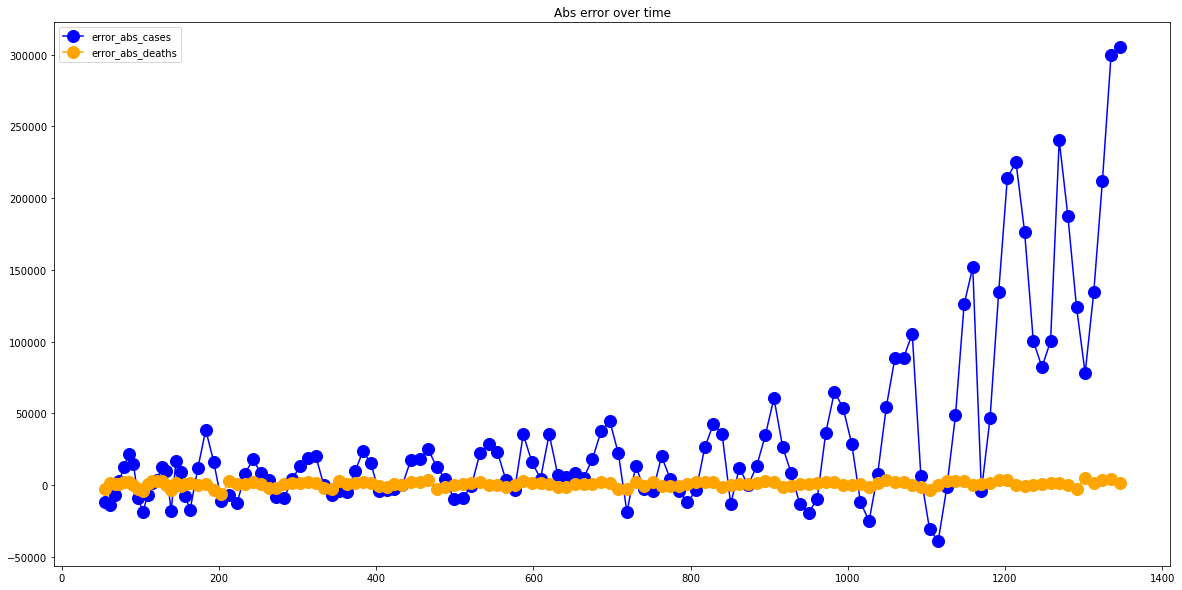

In [7]:
visShow("World")

-- France performances for cases --
MAE =  889.9280575539568
RMSE =  1366.8604208447703
-- France performances for deaths --
MAE =  132.40287769784172
RMSE =  284.3983425869199


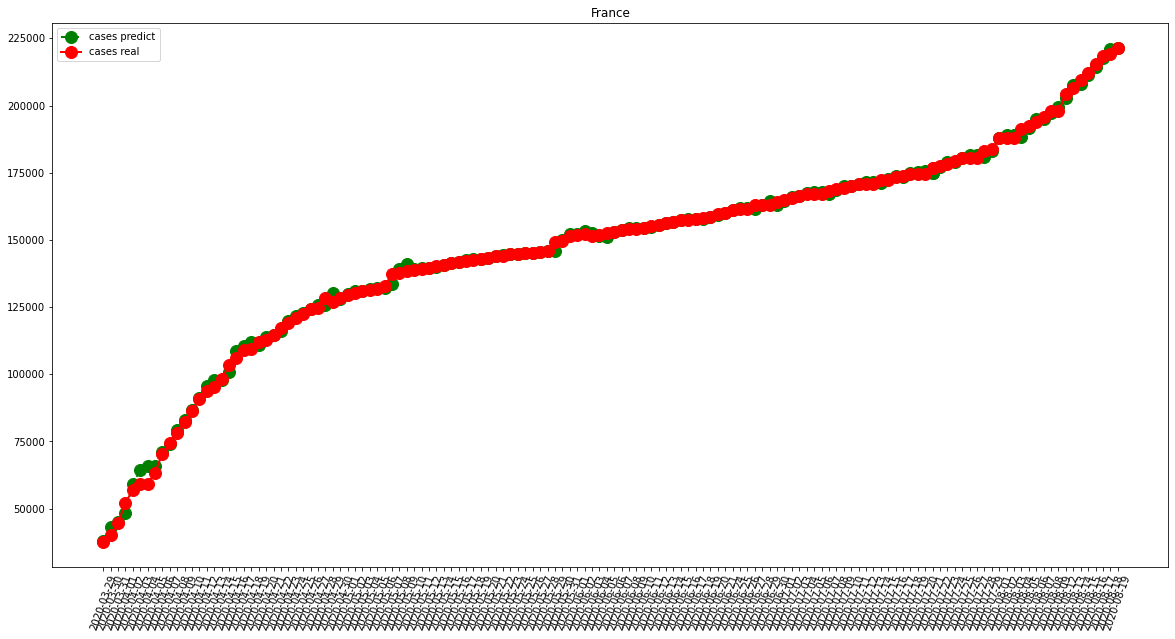

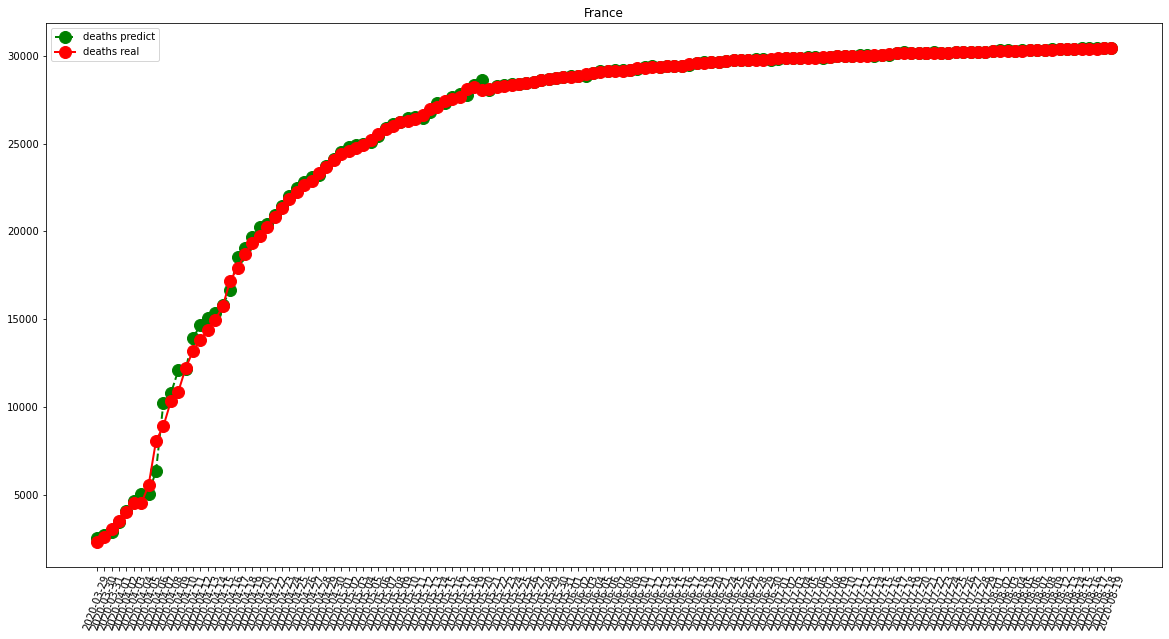

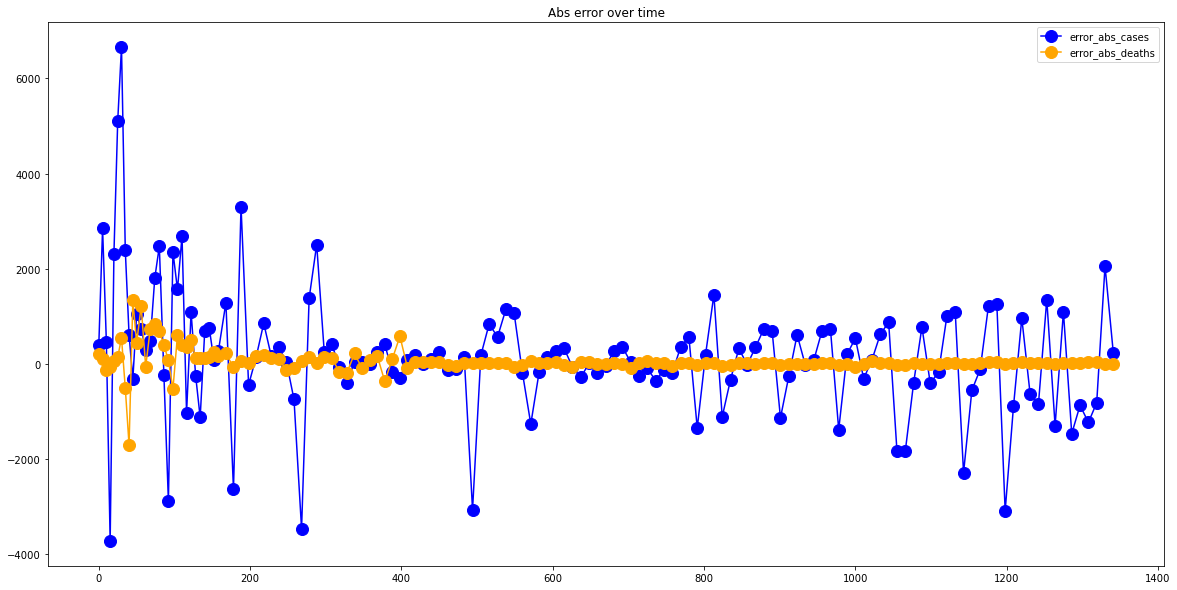

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.3093525179856
RMSE =  466.7130509664863
-- Italy performances for deaths --
MAE =  78.18705035971223
RMSE =  251.70143327122983


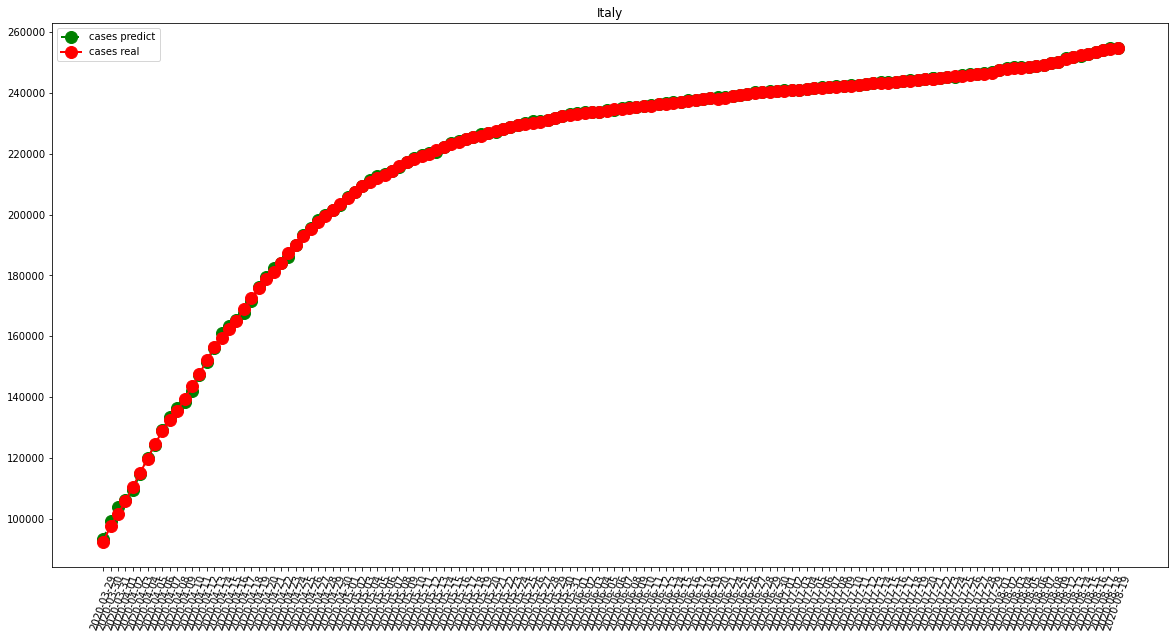

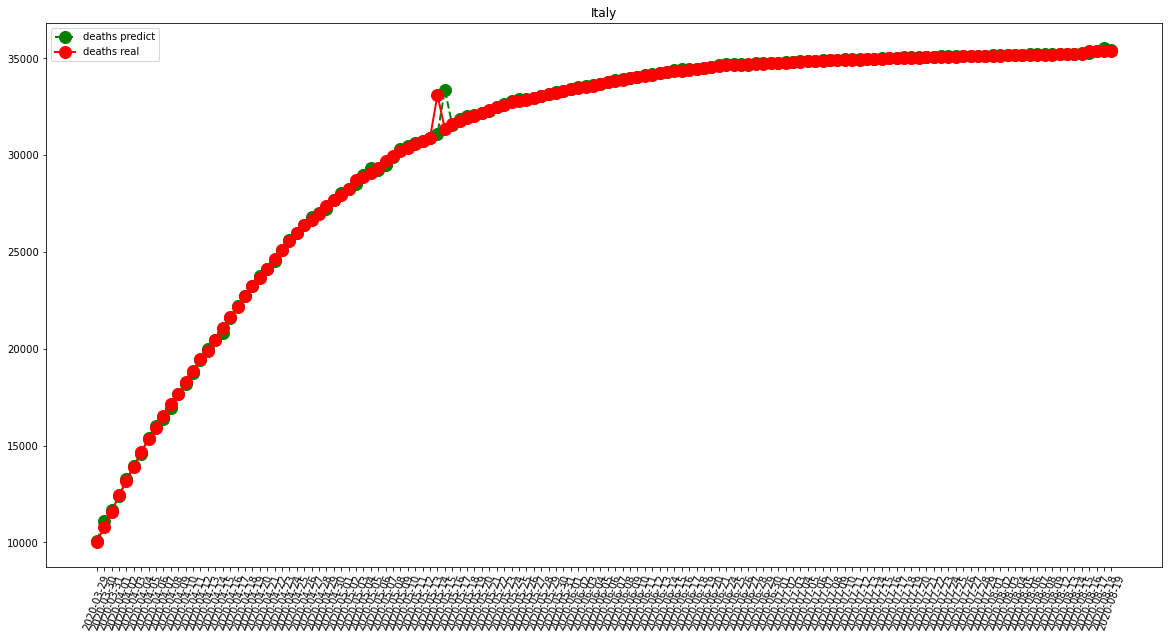

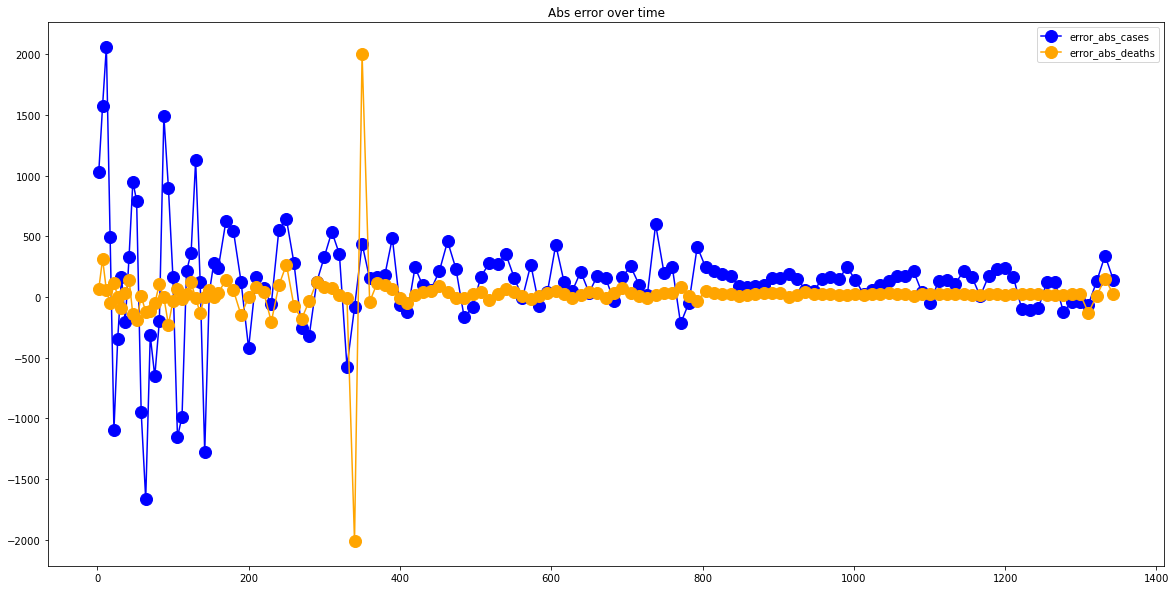

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1427.6690647482014
RMSE =  2759.022559170981
-- Spain performances for deaths --
MAE =  134.58992805755395
RMSE =  344.3905679738522


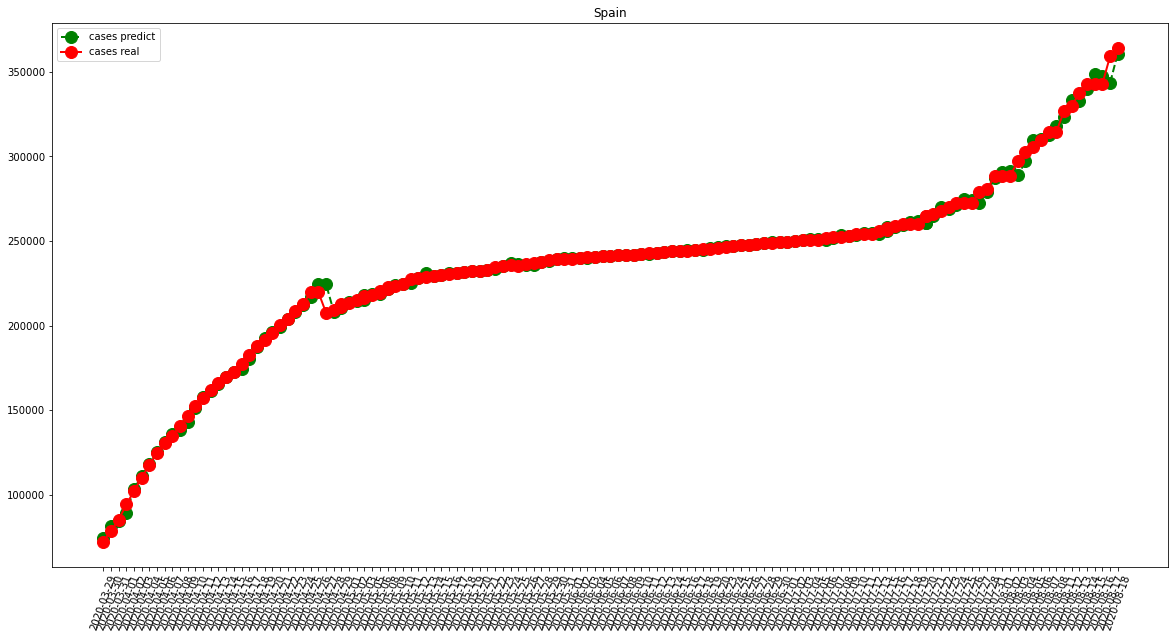

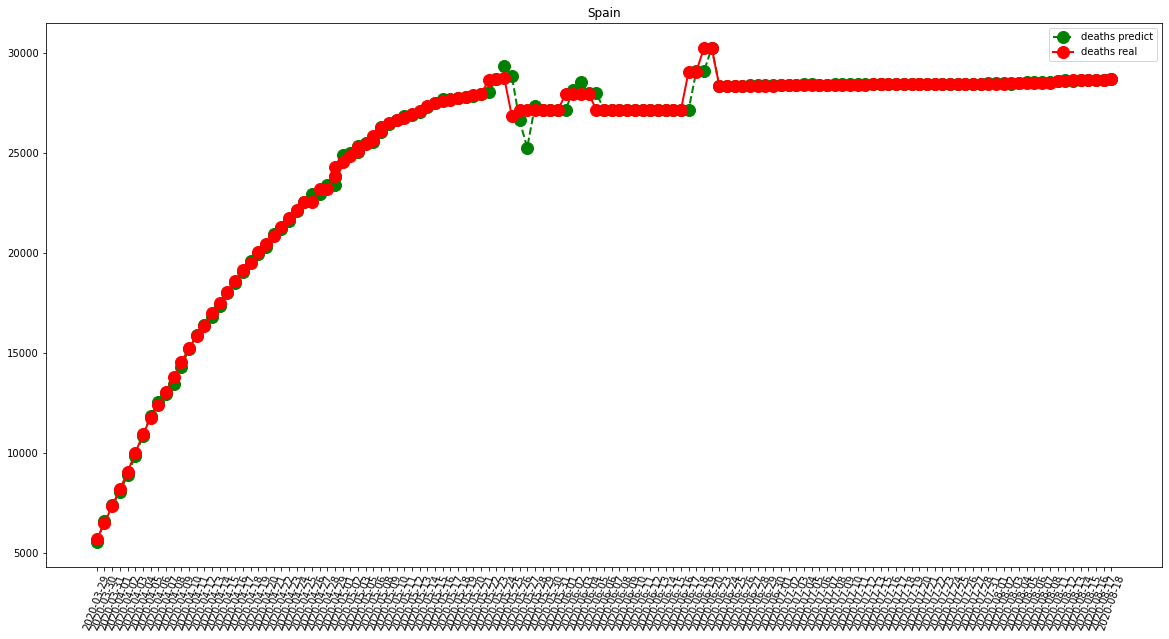

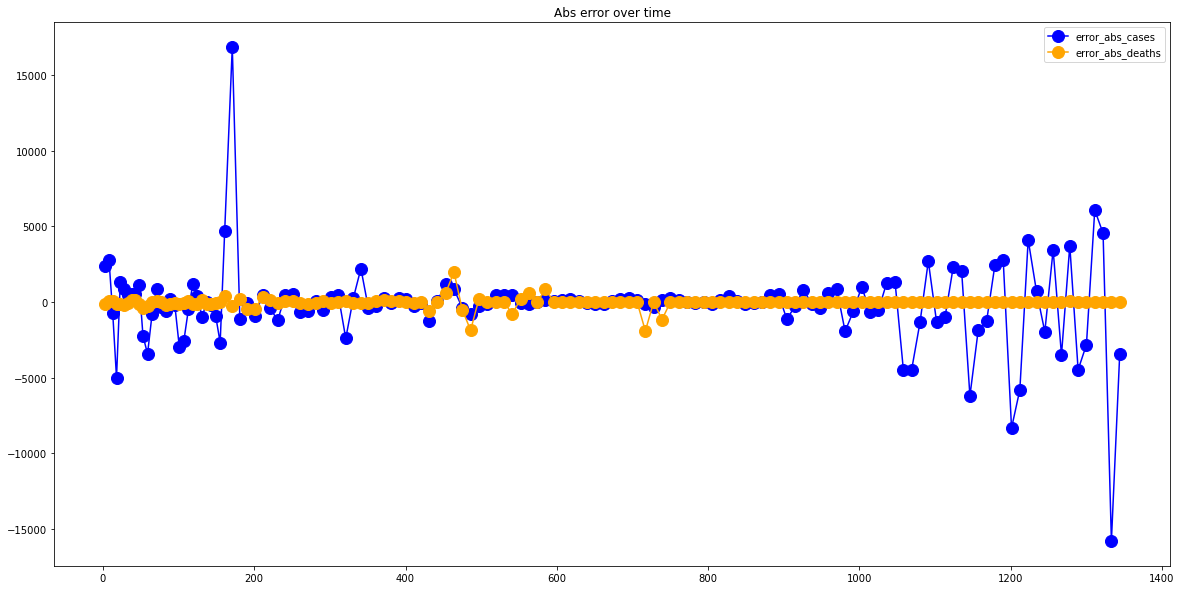

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  9022.510791366907
RMSE =  14111.476788199203
-- United States performances for deaths --
MAE =  496.1798561151079
RMSE =  708.1028204410337


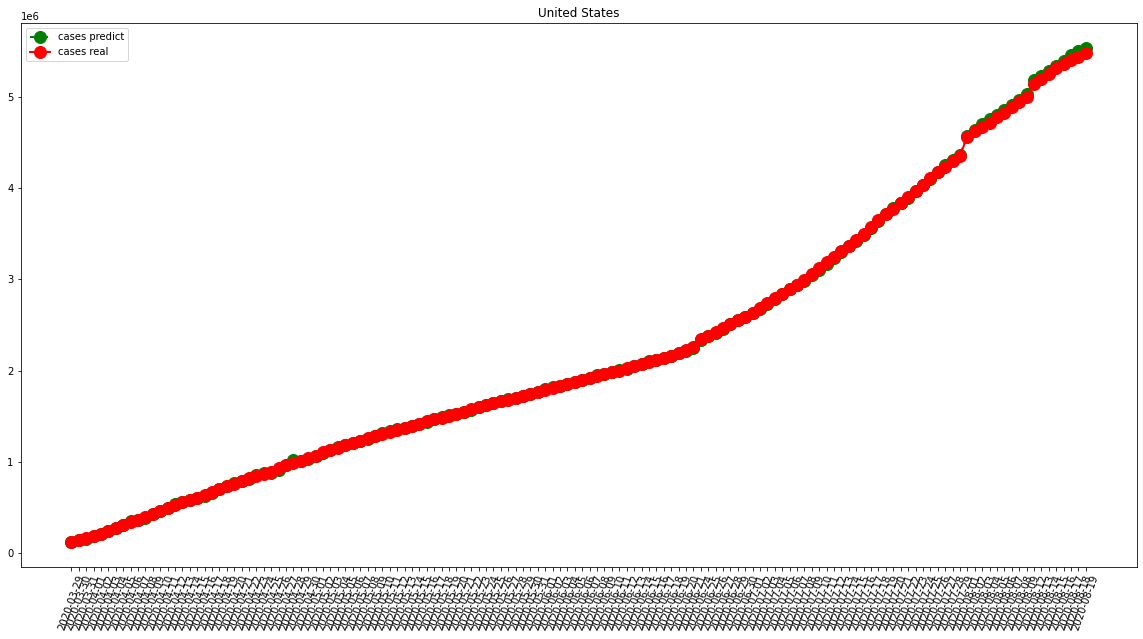

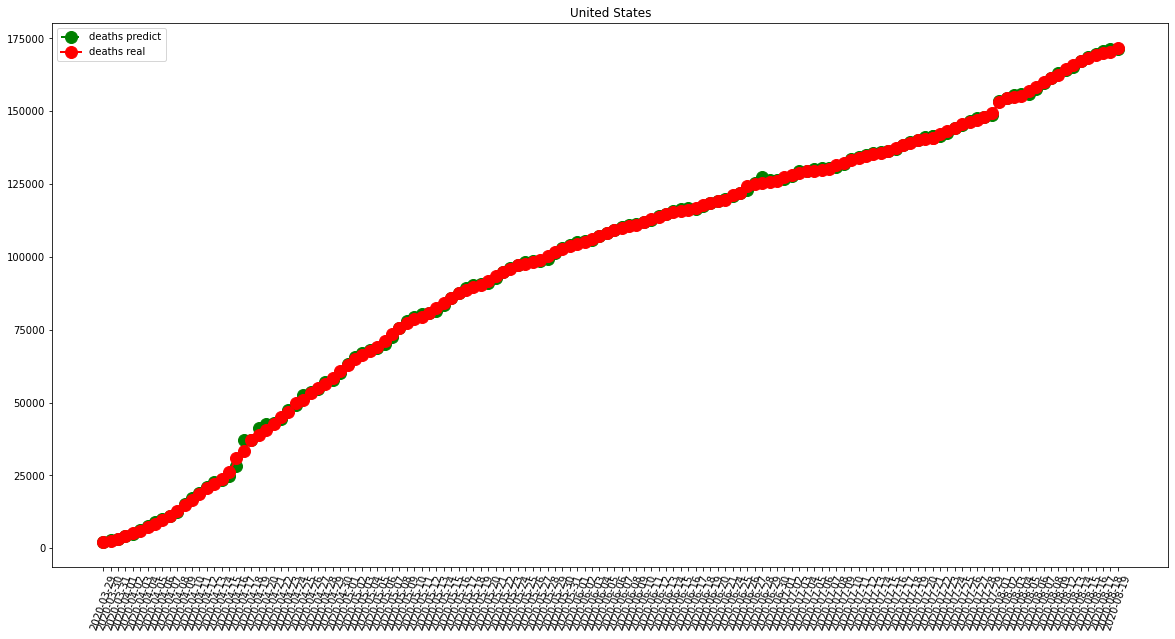

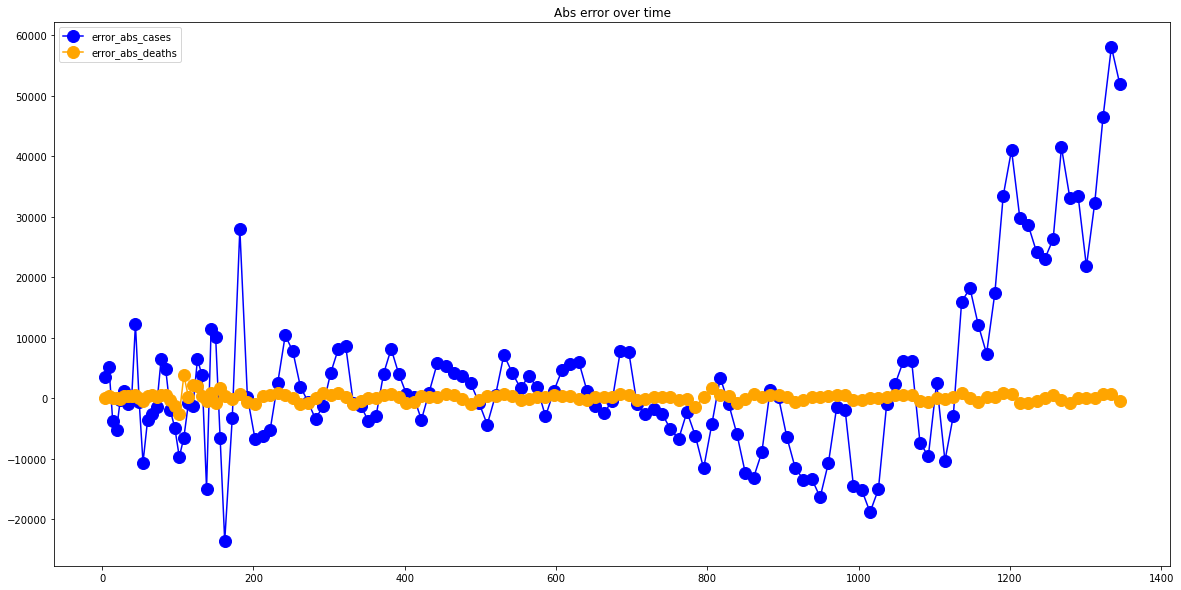

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  71.22302158273381
RMSE =  101.15711833542936
-- China performances for deaths --
MAE =  29.51798561151079
RMSE =  133.17487286492872


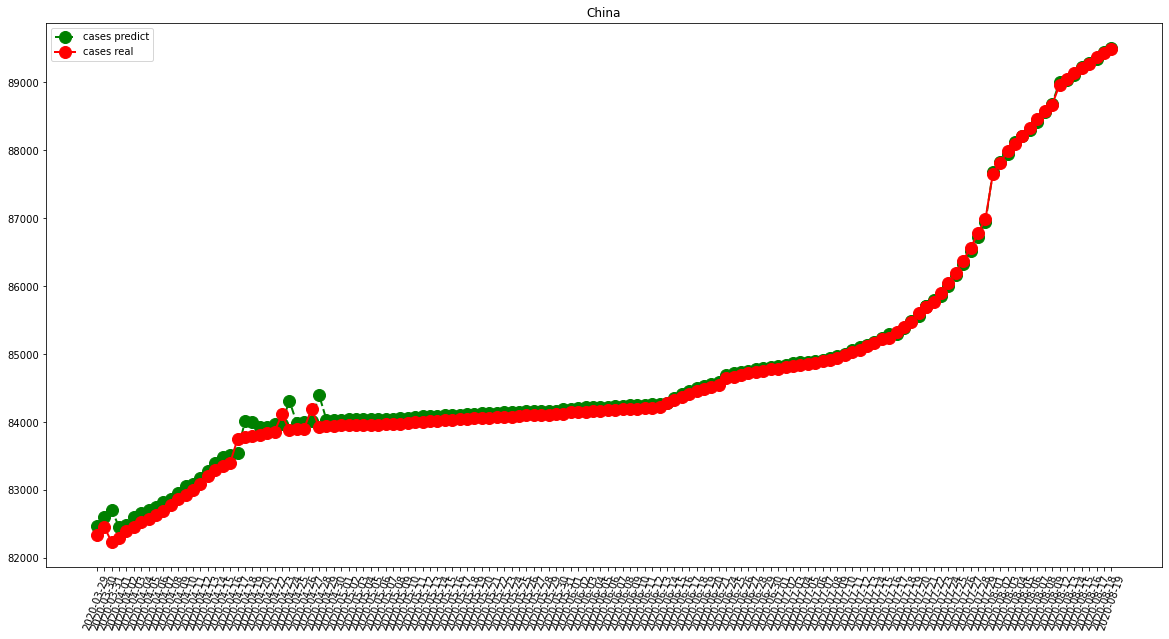

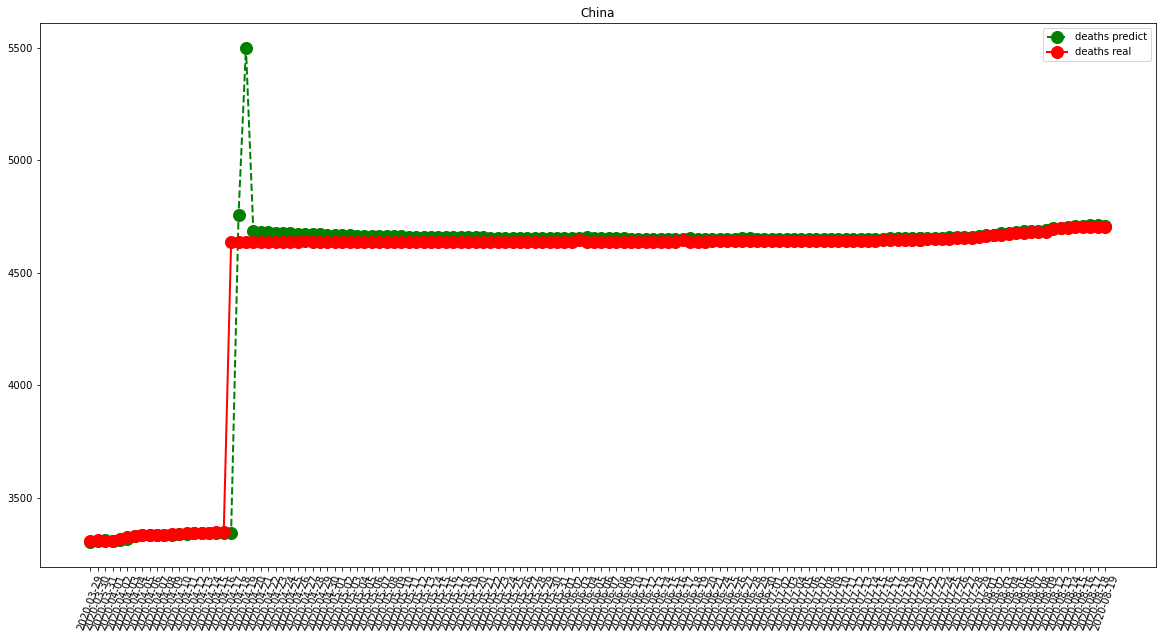

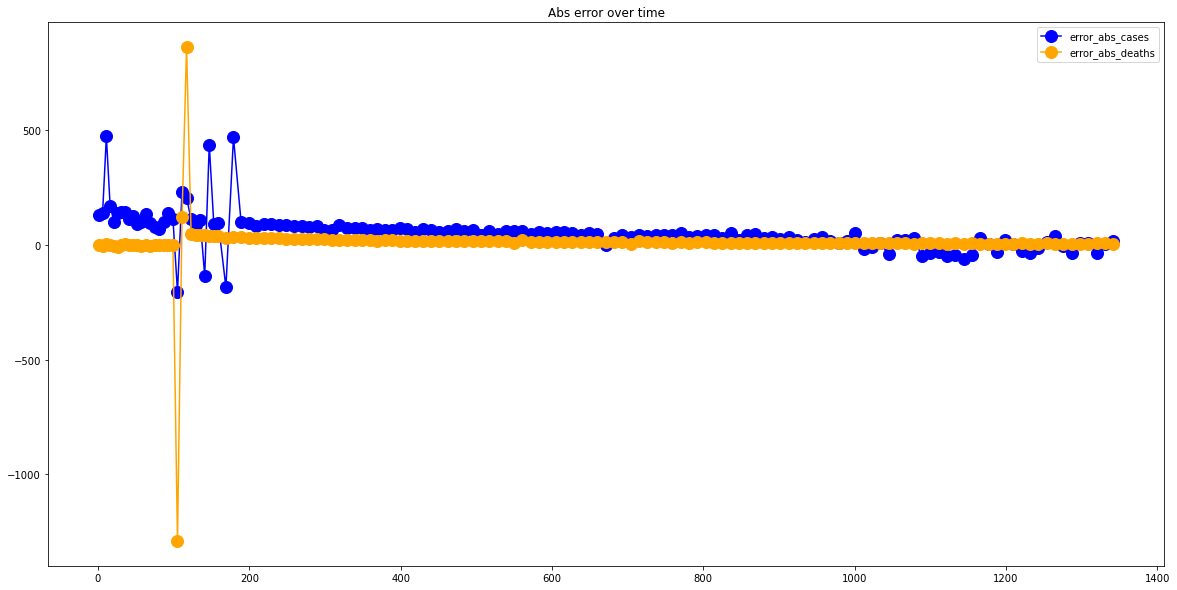

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1164.6216216216217
RMSE =  3968.065213745931
-- United Kingdom performances for deaths --
MAE =  268.2072072072072
RMSE =  809.9232473924097


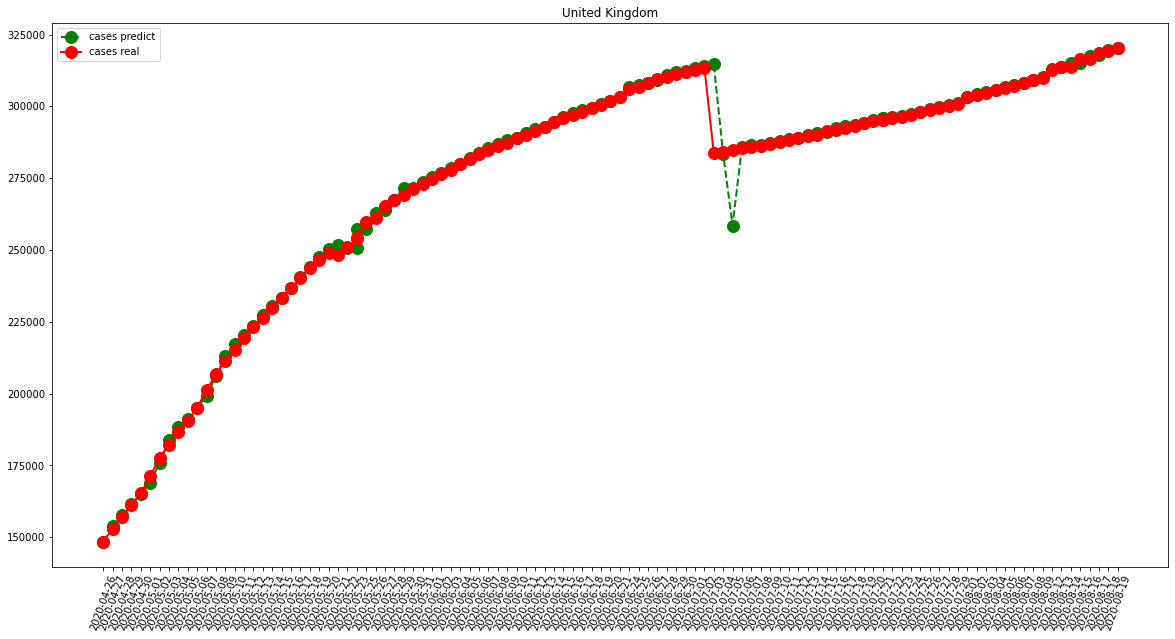

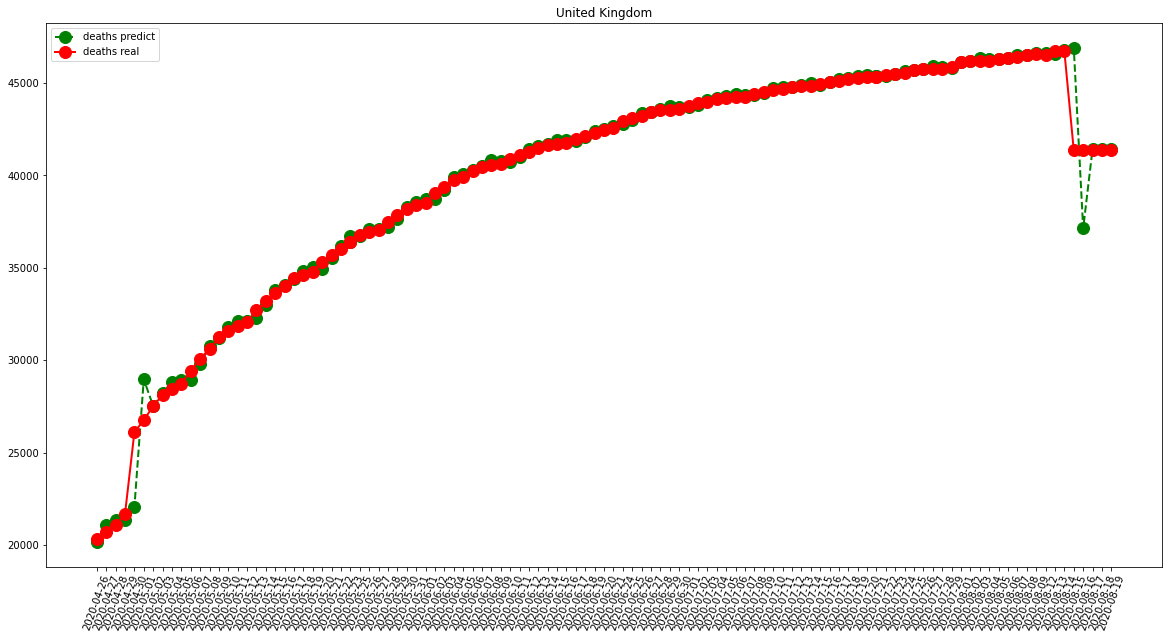

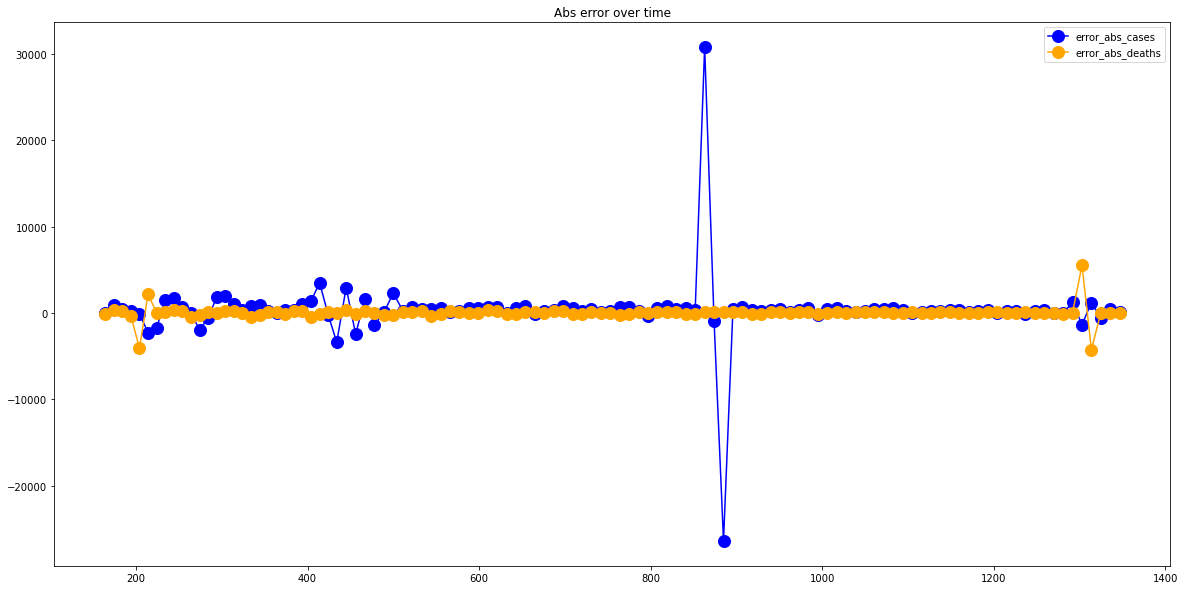

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  346.6126126126126
RMSE =  497.1547695284285
-- Germany performances for deaths --
MAE =  22.765765765765767
RMSE =  41.63212983062762


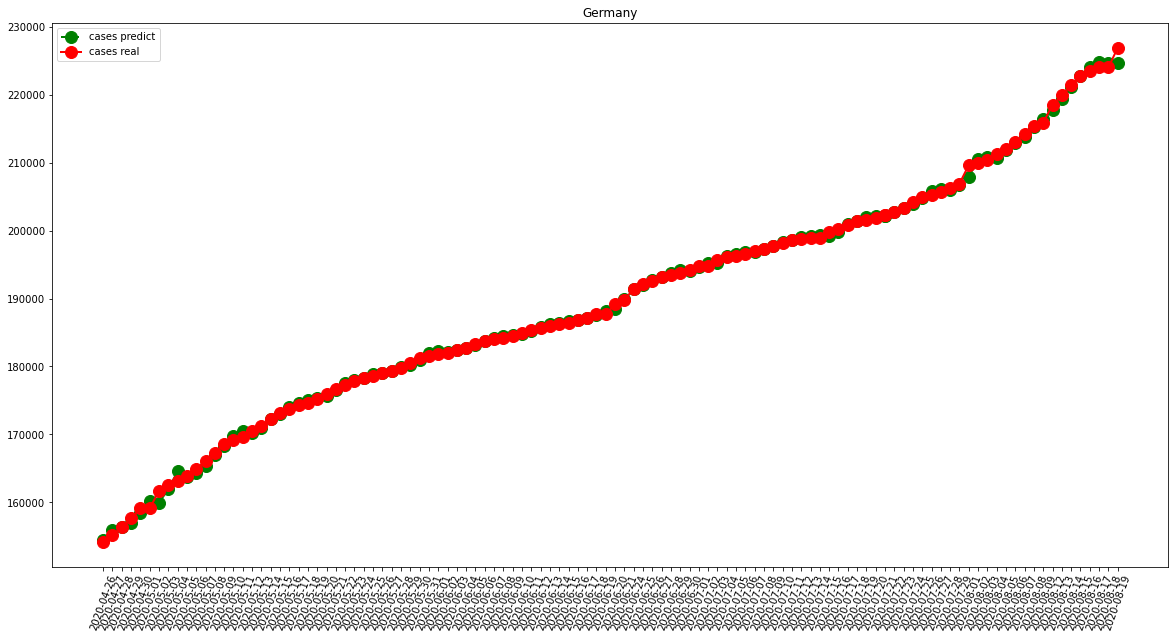

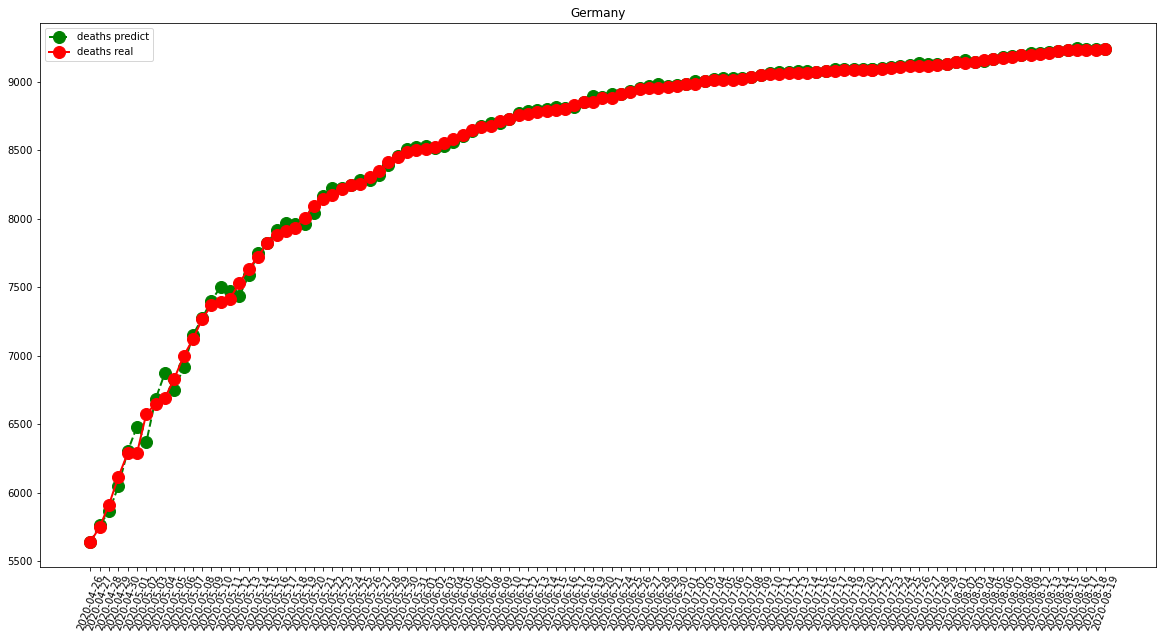

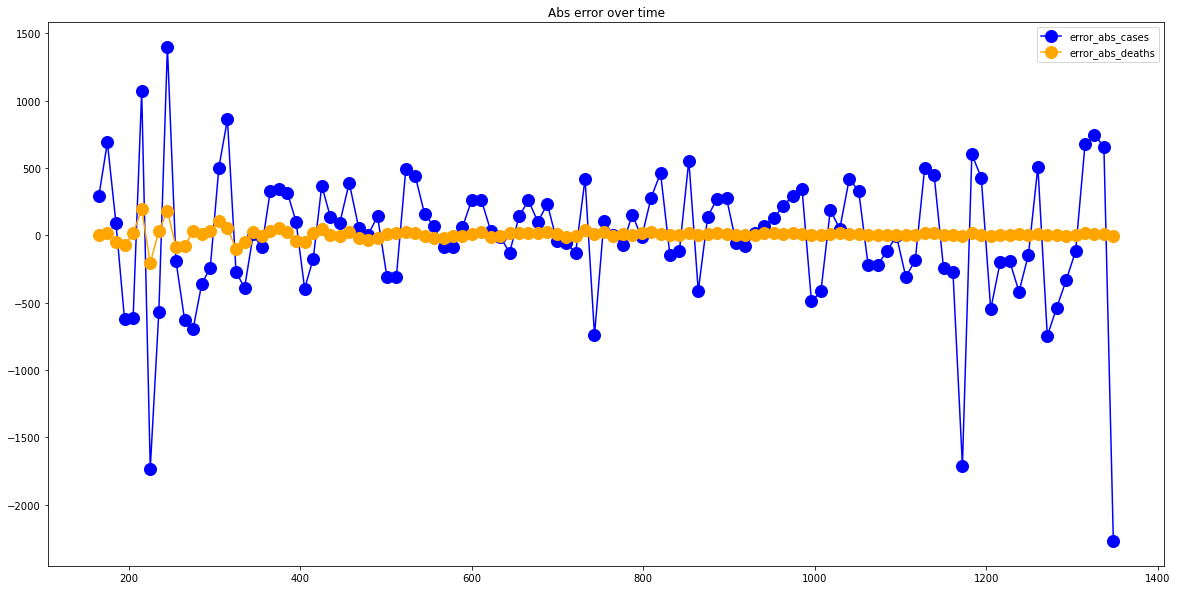

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  654.6936936936937
RMSE =  950.054929659001
-- Iran performances for deaths --
MAE =  34.468468468468465
RMSE =  70.40321450482651


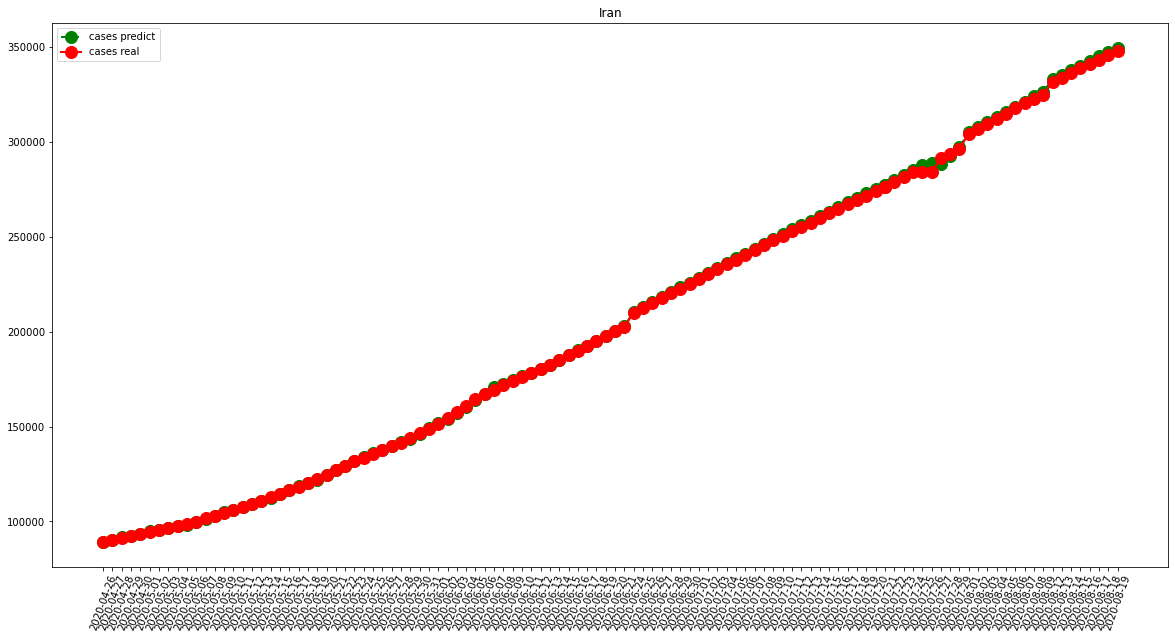

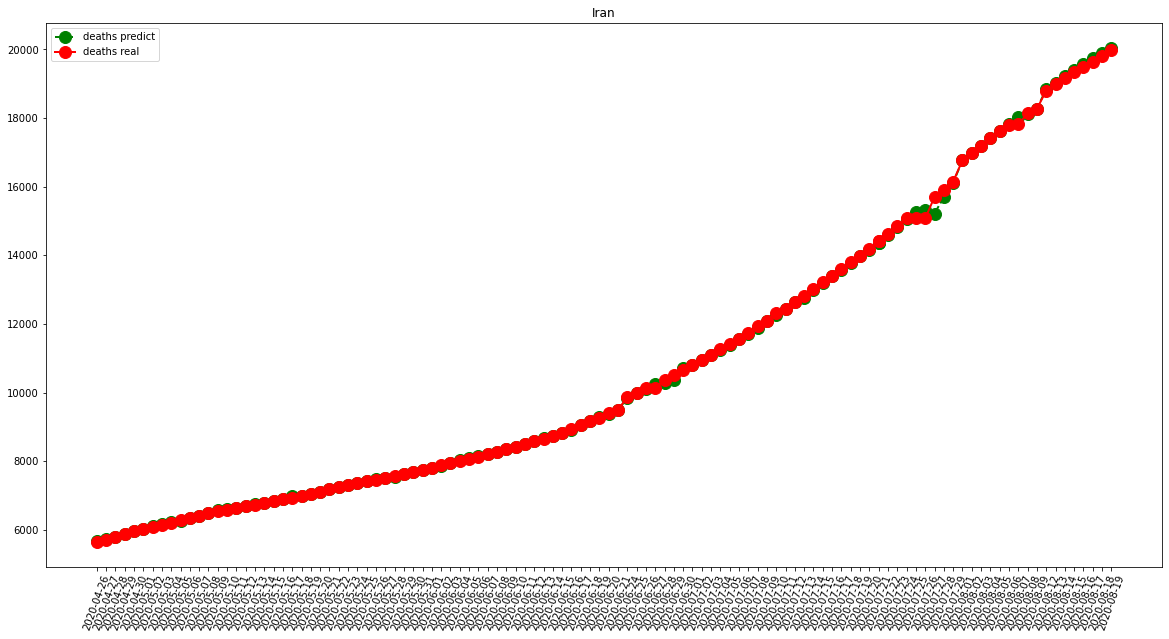

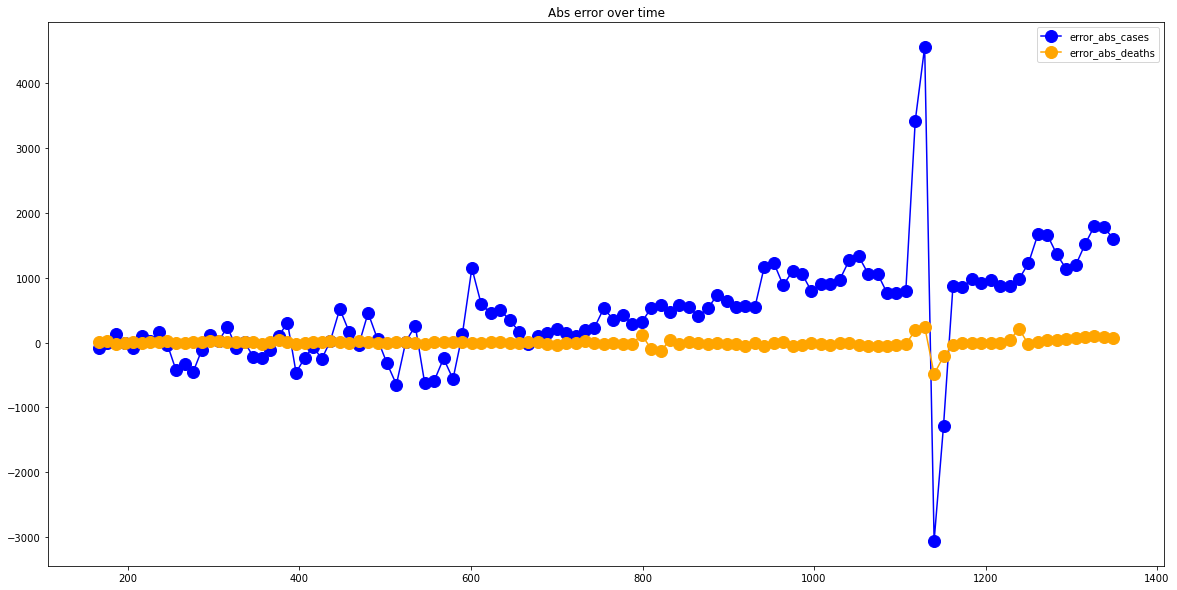

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.55855855855856
RMSE =  331.73146634855993
-- Turkey performances for deaths --
MAE =  17.405405405405407
RMSE =  96.35697518429409


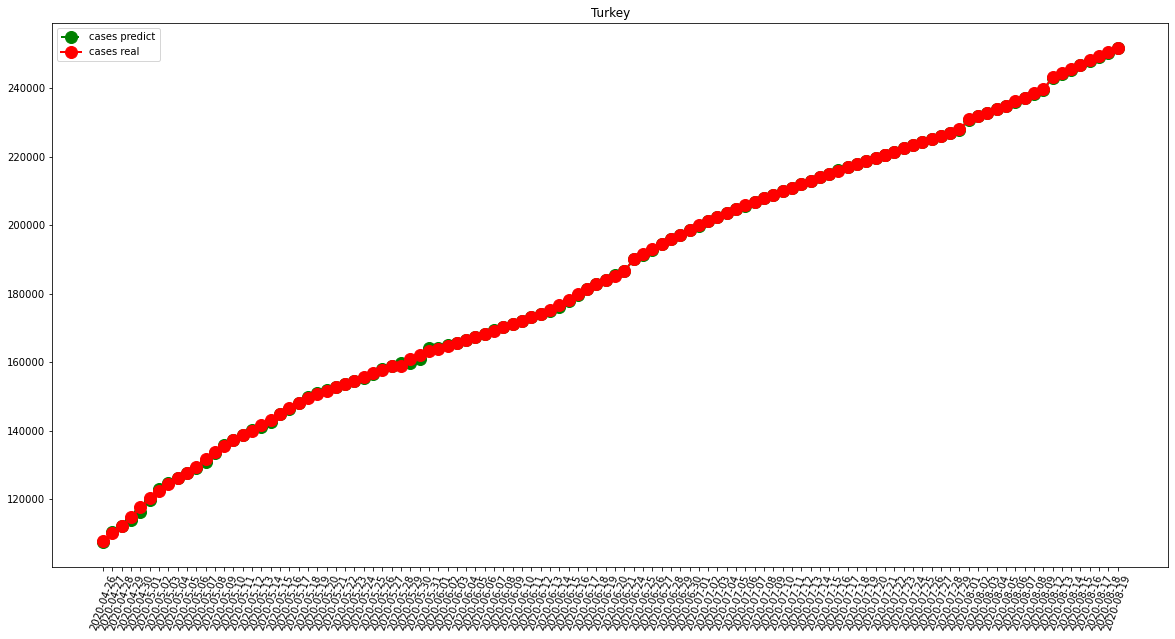

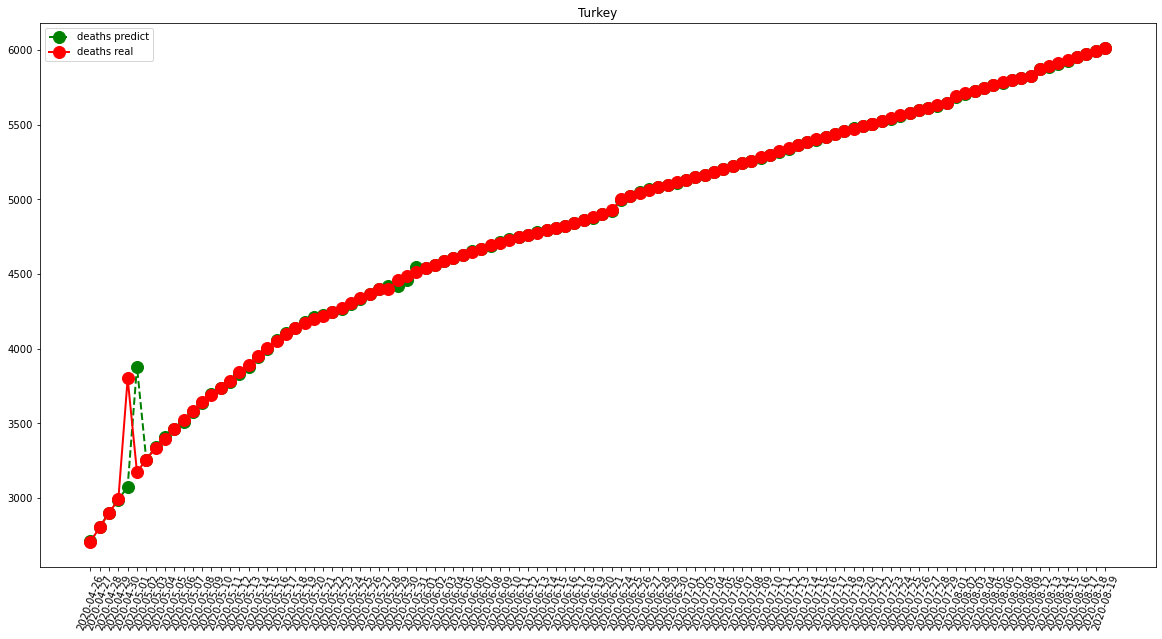

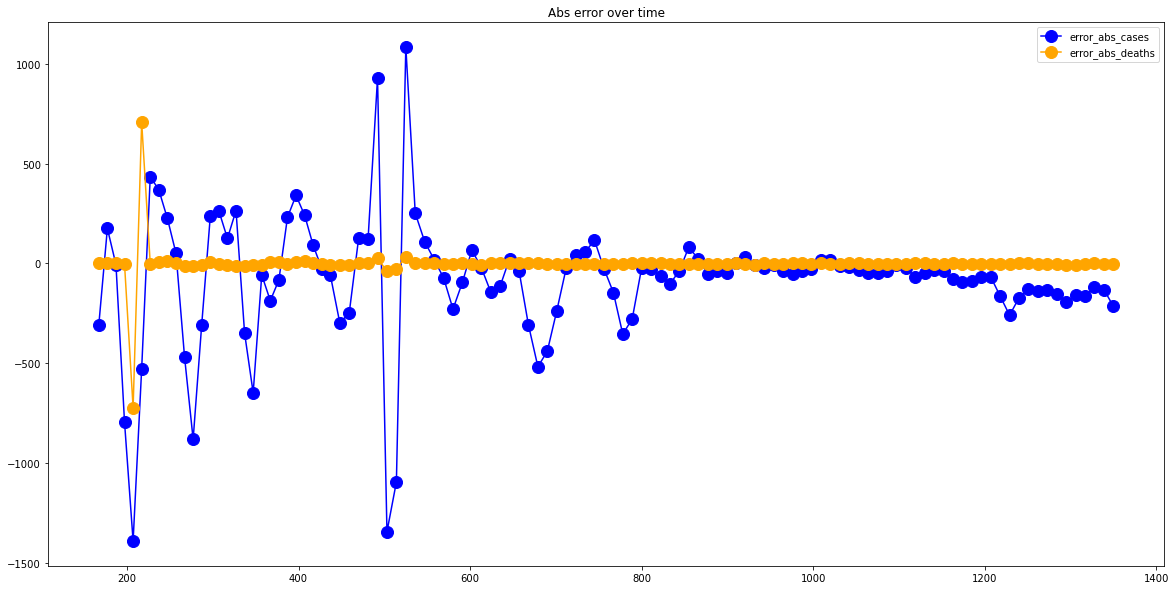

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12621.642857142857
RMSE =  17009.607143919467
-- Brazil performances for deaths --
MAE =  408.4642857142857
RMSE =  502.3372870890633


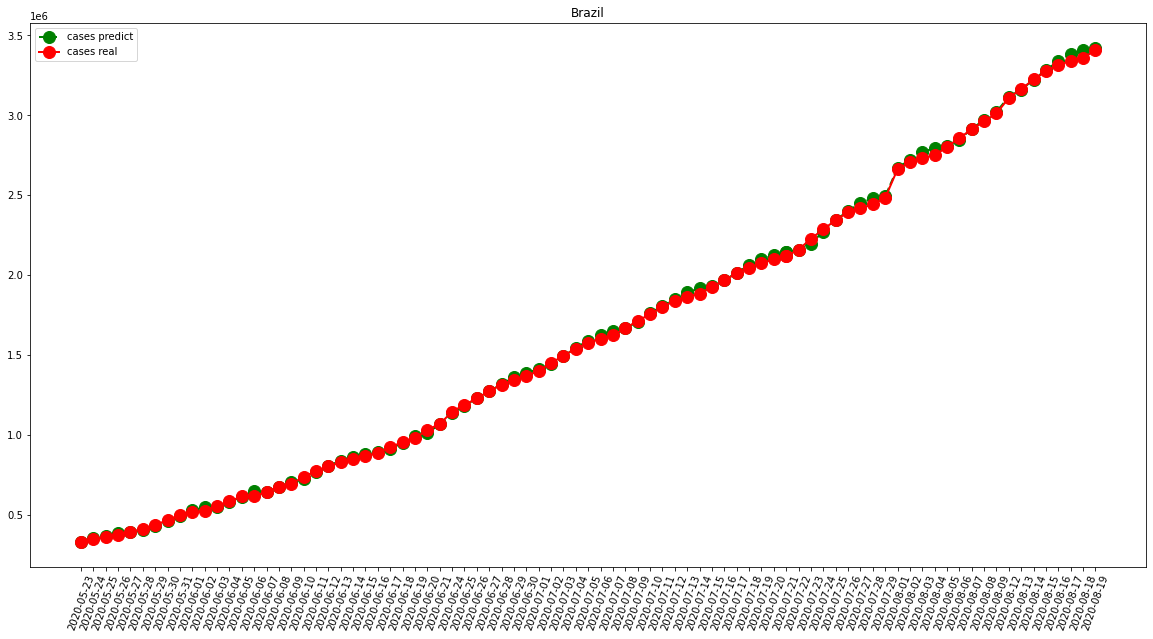

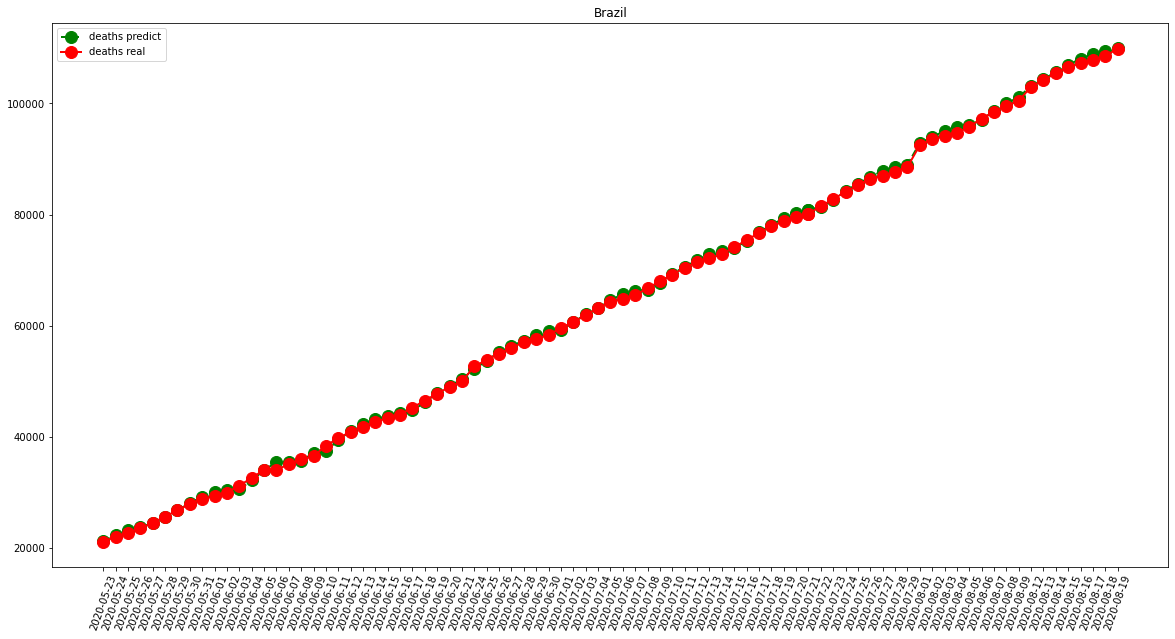

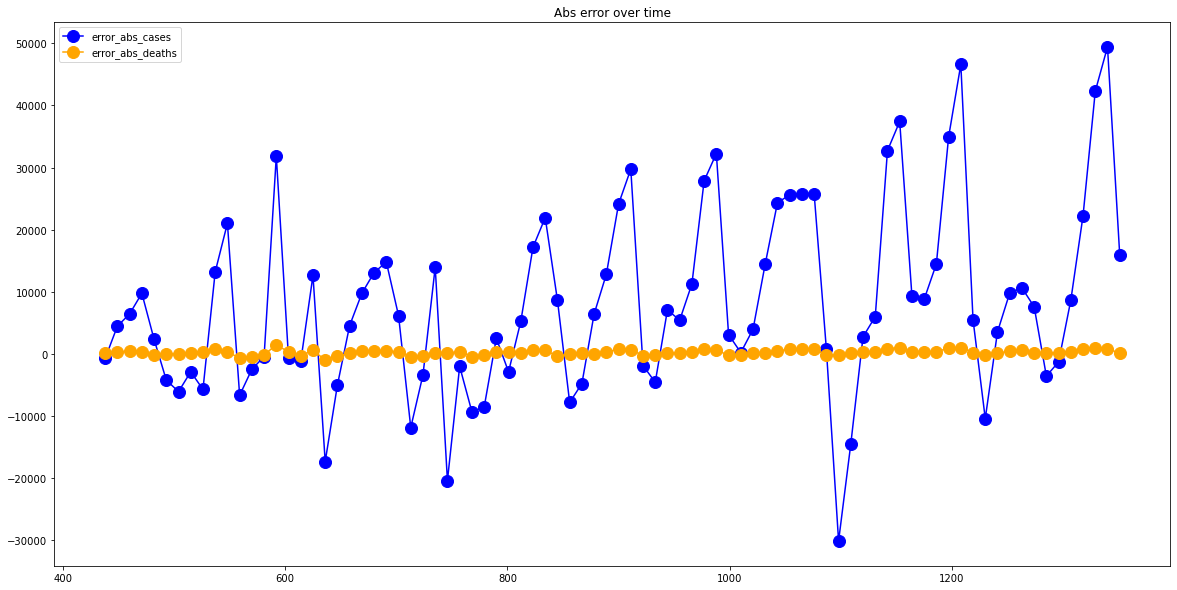

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)